***##################CLUSTERING#########***

- ROMEL CRUZ
- ELIZABETH ALCON
- LUCY ALCON

In [ ]:
!pip install pycaret

In [ ]:
import sys
print (sys.version)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [ ]:
from pycaret.classification import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# Para subir archivos en Colab
from google.colab import files
sns.set(style="whitegrid", context="notebook", palette="muted")
uploaded = files.upload()

Saving F00018324-Latinobarometro_2024_Bolivia_Excel_esp_v1 (1).xlsx to F00018324-Latinobarometro_2024_Bolivia_Excel_esp_v1 (1) (1).xlsx


In [ ]:
file_path = list(uploaded.keys())[0]
print("Archivo subido:", file_path)

Archivo subido: F00018324-Latinobarometro_2024_Bolivia_Excel_esp_v1 (1) (1).xlsx


In [ ]:
df = pd.read_excel(file_path)
print("\nDimensiones originales:", df.shape)
print("Columnas (muestra):", df.columns[:50].tolist())
display(df.head(3))



Dimensiones originales: (1200, 332)
Columnas (muestra): ['NUMINVES: Año del estudio', 'IDENPA: País', 'NUMENTRE: Número de Entrevista', 'REG: Región/ Provincia', 'CIUDAD: Ciudad', 'TAMCIUD: Tamaño de hábitat', 'COMDIST: Denominación muestral: Sector/Municipio/Comuna/Barrio/Distrito', 'EDAD: Edad', 'SEXO: Sexo', 'CODIGO: Código de encuestador', 'DIAREAL: Día de realización', 'MESREAL: Mes de realización', 'INI: Hora de inicio entrevista (HHMM)', 'FIN: Hora de término (HHMM)', 'DURA: Duración de la entrevista (minutos)', 'TOTRECH: Número total de rechazos', 'TOTNOCONT: Total de no contactos (Antes pérdidas)', 'TOTREVI: Control de revisitas', 'EDESCSINCONT: Elegibilidad desconocida sin contacto', 'NEGATELEGDESC: Negativa de una persona sin comprobar elegibilidad', 'OTROSELEGDES: Otros casos de elegibilidad desconocida', 'TOTCUOT: Control de Cuotas', 'NUMCASA: Número de hogares distintos contactados para conseguir esta entrevista', 'CODSUPER: Código Supervisor', 'SUPERVVI: Supervisión viv

,NUMINVES: Año del estudio,IDENPA: País,NUMENTRE: Número de Entrevista,REG: Región/ Provincia,CIUDAD: Ciudad,TAMCIUD: Tamaño de hábitat,COMDIST: Denominación muestral: Sector/Municipio/Comuna/Barrio/Distrito,EDAD: Edad,SEXO: Sexo,CODIGO: Código de encuestador,...,S23: Tipo de trabajo que realiza el jefe de familia,S24: Apreciación nivel socioeconómico (realizado por el encuestador),S25: Apreciación de la condición de la entrevista,REEDUC.1: Nivel de estudios alcanzado - Entrevistado (recodificado),REEDUC.2: Nivel de estudios alcanzado - Padres (Recodificado),REEDUC.3: Nivel de estudios alcanzado - Jefe de familia (Recodificado),REEDAD: EDAD RECODIFICADA,PERPART: Participación en gobierno del partido político al que vota,FAMPART: Familia Partido Político,WT: Ponderación
0,24,68,1,68001,68001002,7,101,55,2,9005,...,-3,2,1,2,0,-3,3,4,99,1
1,24,68,2,68001,68001002,7,101,30,2,9005,...,-3,3,2,4,2,-3,2,4,99,1
2,24,68,3,68001,68001002,7,101,39,2,9001,...,8,3,1,3,5,4,2,4,0,1


In [ ]:
# Normalizar nombres de columnas: minúsculas, sin espacios ni caracteres especiales
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^a-z0-9_]", "", regex=True)

In [ ]:
#  Inspección inicial
print("\n--- Información inicial ---")
df.info()
print("\nNulos por columna (top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))


--- Información inicial ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 332 entries, numinves_ao_del_estudio to wt_ponderacin
dtypes: int64(332)
memory usage: 3.0 MB

Nulos por columna (top 20):
numinves_ao_del_estudio                                                                               0
p2noij8_metas_en_la_vida_de_la_juventud_hoy_emprender_un_negocio                                      0
p2noij6_metas_en_la_vida_de_la_juventud_hoy_tener_una_profesin                                        0
p2noij5_metas_en_la_vida_de_la_juventud_hoy_poder_desarrollar_el_talento                              0
p2noij4_metas_en_la_vida_de_la_juventud_hoy_tener_xito_econmico                                       0
p2noij3_metas_en_la_vida_de_la_juventud_hoy_no_tener_ataduras                                         0
p2noij2_metas_en_la_vida_de_la_juventud_hoy_tener_hijos                                               0
p2noij1_metas_en_la_vida_de_la_juvent

In [ ]:
# Filtrar población objetivo: jóvenes 18-29
# Buscamos columnas de edad por heurística
possible_age_cols = [c for c in df.columns if "edad" in c or c == "age" or "años" in c or "anos" in c]
age_col = possible_age_cols[0] if possible_age_cols else None
if age_col:
    print("\nColumna de edad detectada:", age_col)
    df_jovenes = df[(df[age_col] >= 18) & (df[age_col] <= 29)].copy()
else:
    print("\n⚠️ No se detectó columna de edad. Usaré la muestra completa (revisa manualmente).")
    df_jovenes = df.copy()

print("Registros después del filtro 18-29:", df_jovenes.shape[0])


Columna de edad detectada: edad_edad
Registros después del filtro 18-29: 440


In [ ]:
# Limpiar filas con muchísimos nulos (umbral 50% de columnas no nulas)
df_jovenes = df_jovenes.dropna(thresh=int(df_jovenes.shape[1]*0.5)).reset_index(drop=True)
print("Registros tras eliminar filas muy incompletas:", df_jovenes.shape[0])

Registros tras eliminar filas muy incompletas: 440


In [ ]:
# Búsqueda heurística de variables relevantes
# Definimos palabras clave por dimensión
keywords = {
    "voto": ["vot", "voto", "voto_ult", "voto_reciente", "voto_ult_elecc"],
    "reunion": ["reunion", "asistio_reunion", "reunio", "encuentro"],
    "protesta": ["protest", "manifest", "manifestacion", "protesta"],
    "partido": ["partid", "milit", "pertenece_partido", "afiliacion"],
    "contacto": ["contacto", "contact", "hablo_con", "contacto_funcionario"],
    "interes_politica": ["interes", "interes_politica", "interes_politico"],
    "confianza": ["confianza", "p14", "confia", "trust"],  # 'p14' es patrón en Latinobarómetro para confianza
    "satisfaccion_democracia": ["satisfaccion", "satis", "satisfaccion_democracia"],
    "genero": ["sexo", "genero", "gender"],
    "educacion": ["educ", "nivel_educ", "estudios", "anos_estudio"],
    "ocupacion": ["ocupacion", "actividad", "trabajo"],
    "ingresos": ["ingreso", "ingresos", "salario"]
}

In [ ]:
# Función para encontrar columnas que contengan cualquiera de las subcadenas
def find_cols(dfcols, patterns):
    found = []
    for p in patterns:
        found += [c for c in dfcols if p in c]
    # mantener orden y eliminar duplicados
    return list(dict.fromkeys(found))

found_cols = {}
for k, pats in keywords.items():
    found_cols[k] = find_cols(df_jovenes.columns, pats)
    print(f"\n{k} -> {found_cols[k][:8]}")  # muestro hasta 8 columnas de ejemplo


voto -> ['p26st_la_manera_como_uno_vota_puede_hacer_que_las_cosas_sean_diferentes_en_el_futuro', 'p2ncv8_cosas_hace_usted_para_proteger_el_medioambiente_voto_por_candidatos_que_defienden_el_medioambiente', 'p39stgbsa_partido_que_votara_si_este_domingo_hubiera_elecciones', 'p40stgbsb_voto_gobiernooposicin', 'perpart_participacin_en_gobierno_del_partido_poltico_al_que_vota']

reunion -> []

protesta -> []

partido -> ['p14stg_confianza_en_los_partidos_polticos', 'p20st_no_puede_haber_democracia_sin_partidos_polticos', 'p38stgbs_hay_algn_partido_poltico_hacia_el_cual_se_siente_ms_cercano', 'p39stgbsa_partido_que_votara_si_este_domingo_hubiera_elecciones', 'perpart_participacin_en_gobierno_del_partido_poltico_al_que_vota', 'fampart_familia_partido_poltico']

contacto -> ['totnocont_total_de_no_contactos_antes_prdidas', 'edescsincont_elegibilidad_desconocida_sin_contacto', 'numcasa_nmero_de_hogares_distintos_contactados_para_conseguir_esta_entrevista']

interes_politica -> []

confianza ->

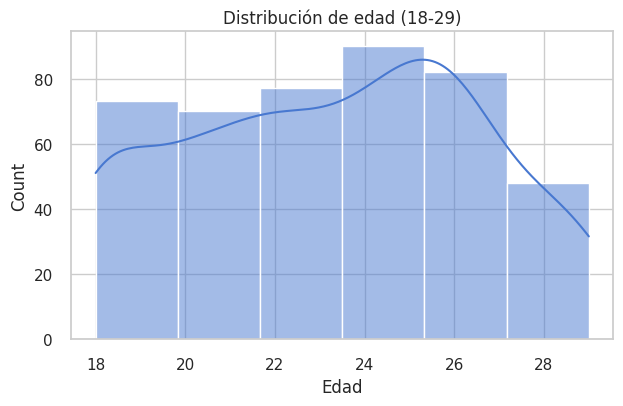

In [ ]:
# EXPLORATORY DATA ANALYSIS (EDA) ----------
#  Distribución de edad
if age_col and age_col in df_jovenes.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df_jovenes[age_col].dropna(), bins=6, kde=True)
    plt.title("Distribución de edad (18-29)")
    plt.xlabel("Edad")
    plt.show()

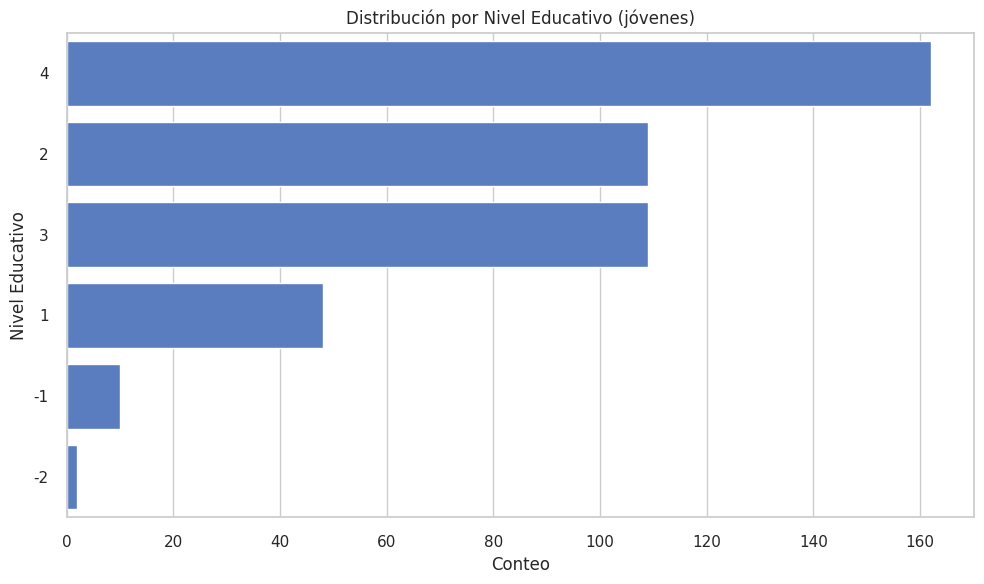

In [ ]:
education_col = found_cols.get("educacion", [None])[0]

if education_col and education_col in df_jovenes.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=education_col, data=df_jovenes, order=df_jovenes[education_col].value_counts().index)
    plt.title("Distribución por Nivel Educativo (jóvenes)")
    plt.xlabel("Conteo")
    plt.ylabel("Nivel Educativo")
    plt.tight_layout()
    plt.show()
else:
    print(f"No se encontró la columna de educación '{education_col}' en el dataset de jóvenes.")

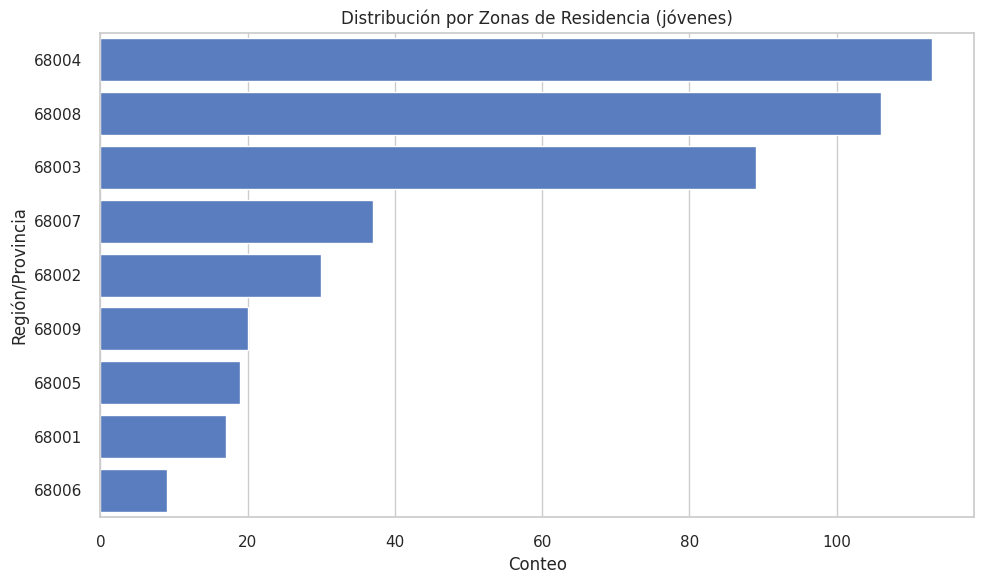

In [ ]:
region_col = 'reg_regin_provincia'

if region_col in df_jovenes.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=region_col, data=df_jovenes, order=df_jovenes[region_col].value_counts().index)
    plt.title("Distribución por Zonas de Residencia (jóvenes)")
    plt.xlabel("Conteo")
    plt.ylabel("Región/Provincia")
    plt.tight_layout()
    plt.show()
else:
    print(f"No se encontró la columna de región '{region_col}' en el dataset de jóvenes.")

In [ ]:
# Missingness overview (porcentaje)
missing_pct = df_jovenes.isnull().mean().sort_values(ascending=False)
print("\nPorcentaje de faltantes (top 30):")
display(missing_pct.head(30))


Porcentaje de faltantes (top 30):


,0
numinves_ao_del_estudio,0.0
p2noij8_metas_en_la_vida_de_la_juventud_hoy_emprender_un_negocio,0.0
p2noij6_metas_en_la_vida_de_la_juventud_hoy_tener_una_profesin,0.0
p2noij5_metas_en_la_vida_de_la_juventud_hoy_poder_desarrollar_el_talento,0.0
p2noij4_metas_en_la_vida_de_la_juventud_hoy_tener_xito_econmico,0.0
p2noij3_metas_en_la_vida_de_la_juventud_hoy_no_tener_ataduras,0.0
p2noij2_metas_en_la_vida_de_la_juventud_hoy_tener_hijos,0.0
p2noij1_metas_en_la_vida_de_la_juventud_hoy_tener_una_pareja,0.0
p1noij_edad_hasta_la_que_se_puede_decir_que_una_persona_es_joven,0.0
p57n_hacer_las_cosas_uno_mismo_de_manera_individual_vs_hacer_las_cosas_con_otras_personas_o_grupos,0.0


In [ ]:
# Visualizaciones para variables detectadas
viz_cols = []
for k in ["interes_politica", "confianza", "satisfaccion_democracia", "genero", "educacion"]:
    if found_cols.get(k):
        viz_cols.append(found_cols[k][0])

print("\nVariables que graficaremos (muestra):", viz_cols)


Variables que graficaremos (muestra): ['p14stgbsa_confianza_en_las_fuerzas_armadas', 'p1st_grado_de_satisfaccin_con_la_vida', 'sexo_sexo', 'p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos']


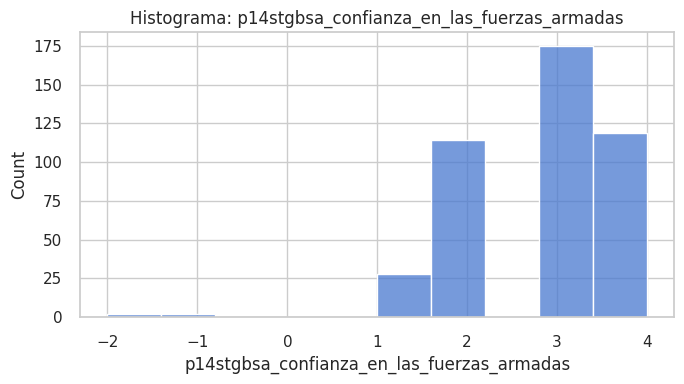

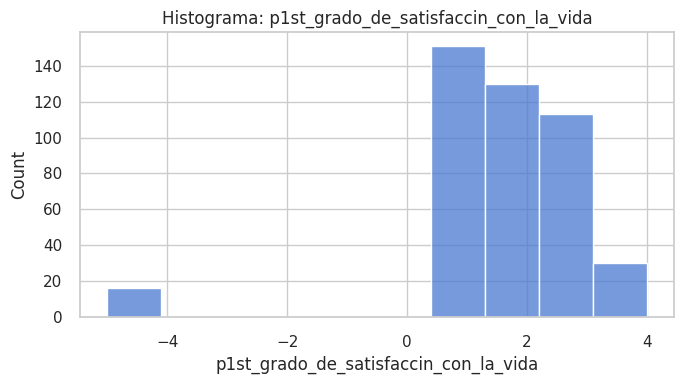

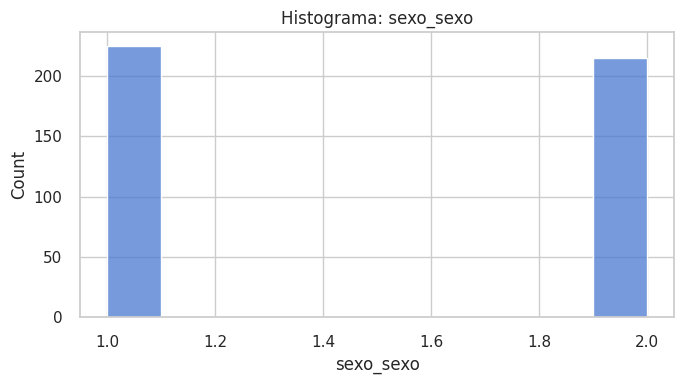

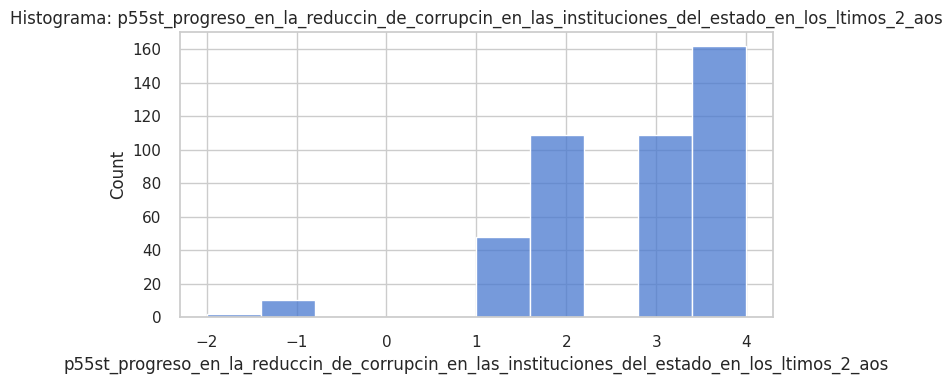

In [ ]:
for col in viz_cols:
    if col in df_jovenes.columns:
        plt.figure(figsize=(7,4))
        if pd.api.types.is_numeric_dtype(df_jovenes[col]):
            sns.histplot(df_jovenes[col].dropna(), bins=10, kde=False)
            plt.title(f"Histograma: {col}")
        else:
            sns.countplot(y=col, data=df_jovenes, order=df_jovenes[col].value_counts().index[:10])
            plt.title(f"Conteo (top) categorías: {col}")
        plt.tight_layout()
        plt.show()

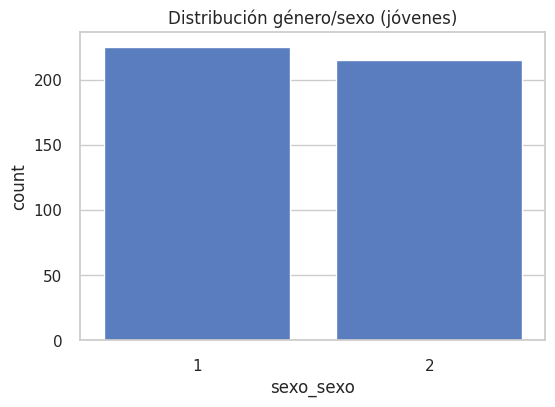

In [ ]:
# Recuento de casos por sexo/género si existe
gender_col = found_cols.get("genero", [None])[0]
if gender_col and gender_col in df_jovenes.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=gender_col, data=df_jovenes, order=df_jovenes[gender_col].value_counts().index)
    plt.title("Distribución género/sexo (jóvenes)")
    plt.show()

In [ ]:
# FEATURE EXTRACTION ----------
# 4.1 Crear componentes indicadoras de participación (voto, reunión, protesta, pertenencia partido, contacto)
# Selecciono la columna más plausible por componente (si existe)
def pick_first(col_list):
    return col_list[0] if col_list else None

col_voto = pick_first(found_cols['voto'])
col_reunion = pick_first(found_cols['reunion'])
col_protesta = pick_first(found_cols['protesta'])
col_partido = pick_first(found_cols['partido'])
col_contacto = pick_first(found_cols['contacto'])

print("\nColumnas seleccionadas para componentes:")
print("voto:", col_voto)
print("reunion:", col_reunion)
print("protesta:", col_protesta)
print("partido:", col_partido)
print("contacto:", col_contacto)



Columnas seleccionadas para componentes:
voto: p26st_la_manera_como_uno_vota_puede_hacer_que_las_cosas_sean_diferentes_en_el_futuro
reunion: None
protesta: None
partido: p14stg_confianza_en_los_partidos_polticos
contacto: totnocont_total_de_no_contactos_antes_prdidas


In [ ]:
# Función robusta para convertir distintas codificaciones a binario (1=participó, 0=no, NaN=ns/nc)
def to_binary(series):
    if series is None:
        return None
    s = series.copy()
    # si numérico:
    if pd.api.types.is_numeric_dtype(s):
        uniques = sorted([u for u in s.dropna().unique()])
        # Latinobarómetro suele codificar: 1=Sí, 2=No, 8=NS, 9=NC
        mapping = {}
        if set(uniques).intersection({1,2,8,9}):
            mapping = {1:1, 2:0, 8:np.nan, 9:np.nan}
            return s.replace(mapping).astype('float')
        # si 1-4 escala (por ejemplo: 1=mucho,2=bastante,3=poco,4=nada) => considerar 1-2 como 'sí/interes'
        if max(uniques) <= 5 and min(uniques) >= 1:
            return s.apply(lambda x: 1 if pd.notnull(x) and x<=2 else (0 if pd.notnull(x) else np.nan)).astype('float')
        # en caso general, mapear >0 a 1
        return s.apply(lambda x: 1 if pd.notnull(x) and x>0 else (0 if pd.notnull(x) else np.nan)).astype('float')
    else:
        # texto: normalizar
        s2 = s.astype(str).str.lower().str.strip()
        return s2.replace({"si":1,"sí":1,"s":1,"no":0,"n":0}).apply(lambda x: float(x) if x in [0,1] else np.nan)

In [ ]:
# Crear series binarias según columnas detectadas
components = {}
for name, col in [('voto', col_voto), ('reunion', col_reunion), ('protesta', col_protesta),
                  ('partido', col_partido), ('contacto', col_contacto)]:
    if col is not None and col in df_jovenes.columns:
        df_jovenes[f'comp_{name}'] = to_binary(df_jovenes[col])
        components[name] = f'comp_{name}'
        print(f"Creada comp_{name} (basada en {col}) - valores únicos:", sorted(df_jovenes[f'comp_{name}'].dropna().unique())[:10])
    else:
        print(f"No se creó comp_{name} (columna no disponible)")

comp_cols = [c for c in df_jovenes.columns if c.startswith('comp_')]
print("\nComponentes creados:", comp_cols)


Creada comp_voto (basada en p26st_la_manera_como_uno_vota_puede_hacer_que_las_cosas_sean_diferentes_en_el_futuro) - valores únicos: [-2.0, -1.0, 0.0, 1.0]
No se creó comp_reunion (columna no disponible)
No se creó comp_protesta (columna no disponible)
Creada comp_partido (basada en p14stg_confianza_en_los_partidos_polticos) - valores únicos: [-2.0, -1.0, 0.0, 1.0, 3.0, 4.0]
Creada comp_contacto (basada en totnocont_total_de_no_contactos_antes_prdidas) - valores únicos: [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 10.0]

Componentes creados: ['comp_voto', 'comp_partido', 'comp_contacto']


In [ ]:
# 4.2 Construir variable dependiente (participation_score + binaria)
if comp_cols:
    df_jovenes['participation_score'] = df_jovenes[comp_cols].sum(axis=1, skipna=True)  # suma de acciones
    # Definimos participacion_politica binaria: 1 si realizó al menos 1 acción observada
    df_jovenes['participacion_politica'] = (df_jovenes['participation_score'] >= 1).astype(int)
    print("\nDistribución participation_score (top valores):")
    display(df_jovenes['participation_score'].value_counts(dropna=False).head(20))
    print("\nDistribución participacion_politica:")
    display(df_jovenes['participacion_politica'].value_counts(dropna=False))
else:
    raise ValueError("No se pudieron crear componentes de participación. Revisa las columnas del dataset.")


Distribución participation_score (top valores):


,count
participation_score,
4.0,156
5.0,140
3.0,49
1.0,35
0.0,16
6.0,14
2.0,10
8.0,6
7.0,4



Distribución participacion_politica:


,count
participacion_politica,
1,420
0,20


In [ ]:
# 4.3 Selección de variables independientes candidatas (heurística)
candidate_keys = ["interes_politica", "confianza", "satisfaccion_democracia", "genero", "educacion", "ocupacion", "ingresos"]
indep_candidates = []
for k in candidate_keys:
    cols = found_cols.get(k, [])
    if cols:
        # tomar hasta 2 columnas por dimensión para no saturar
        indep_candidates += cols[:2]


In [ ]:
# incluir edad si fue encontrada
if age_col:
    indep_candidates.append(age_col)

In [ ]:
# limpiar duplicados y verificar existencia
indep_candidates = [c for c in pd.Series(indep_candidates).unique() if c in df_jovenes.columns]
print("\nVariables independientes candidatas (lista):", indep_candidates)


Variables independientes candidatas (lista): ['p14stgbsa_confianza_en_las_fuerzas_armadas', 'p14stgbsb_confianza_en_la_polica', 'p1st_grado_de_satisfaccin_con_la_vida', 'p12stgbsa_satisfaccin_con_la_democracia', 'sexo_sexo', 'p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos', 'reeduc1_nivel_de_estudios_alcanzado__entrevistado_recodificado', 's18a_estado_ocupacional', 's18b_estado_ocupacional_anteriormente', 'p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas', 's5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades', 'edad_edad']


In [ ]:
# 4.4 Crear dataframe para modelado/EDA reducido con target + independientes + componentes
cols_final = ['participacion_politica', 'participation_score'] + indep_candidates + comp_cols
cols_final = [c for c in cols_final if c in df_jovenes.columns]
df_modelo = df_jovenes[cols_final].copy()
print("\nDimensiones df_modelo:", df_modelo.shape)
display(df_modelo.head(5))


Dimensiones df_modelo: (440, 17)


,participacion_politica,participation_score,p14stgbsa_confianza_en_las_fuerzas_armadas,p14stgbsb_confianza_en_la_polica,p1st_grado_de_satisfaccin_con_la_vida,p12stgbsa_satisfaccin_con_la_democracia,sexo_sexo,p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos,reeduc1_nivel_de_estudios_alcanzado__entrevistado_recodificado,s18a_estado_ocupacional,s18b_estado_ocupacional_anteriormente,p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas,s5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades,edad_edad,comp_voto,comp_partido,comp_contacto
0,1,4.0,2,3,1,3,1,2,5,4,8,2,3,23,1.0,3.0,0.0
1,1,5.0,2,2,3,3,1,3,7,4,3,4,2,28,1.0,4.0,0.0
2,1,5.0,3,4,1,4,1,4,5,1,-3,3,1,21,1.0,4.0,0.0
3,1,4.0,1,2,1,1,1,1,3,6,-3,3,4,18,0.0,4.0,0.0
4,1,5.0,3,4,1,3,1,4,5,1,-3,-1,1,24,1.0,4.0,0.0


In [ ]:
# ---------- Más EDA: correlaciones, comparaciones por grupo ----------
# Missingness en df_modelo
print("\nPorcentaje faltantes en df_modelo:")
display(df_modelo.isnull().mean().sort_values(ascending=False).head(40))


Porcentaje faltantes en df_modelo:


,0
comp_contacto,0.004545
s18a_estado_ocupacional,0.000000
comp_partido,0.000000
comp_voto,0.000000
edad_edad,0.000000
s5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades,0.000000
p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas,0.000000
s18b_estado_ocupacional_anteriormente,0.000000
participacion_politica,0.000000
participation_score,0.000000


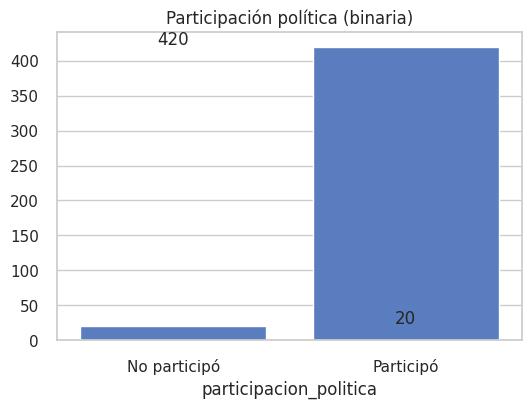

In [ ]:
# Distribución de la variable objetivo
plt.figure(figsize=(6,4))
counts = df_modelo['participacion_politica'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks([0,1], ['No participó','Participó'])
plt.title("Participación política (binaria)")
for i,v in enumerate(counts.values):
    plt.text(i, v + max(counts.values)*0.01, str(v), ha='center')
plt.show()

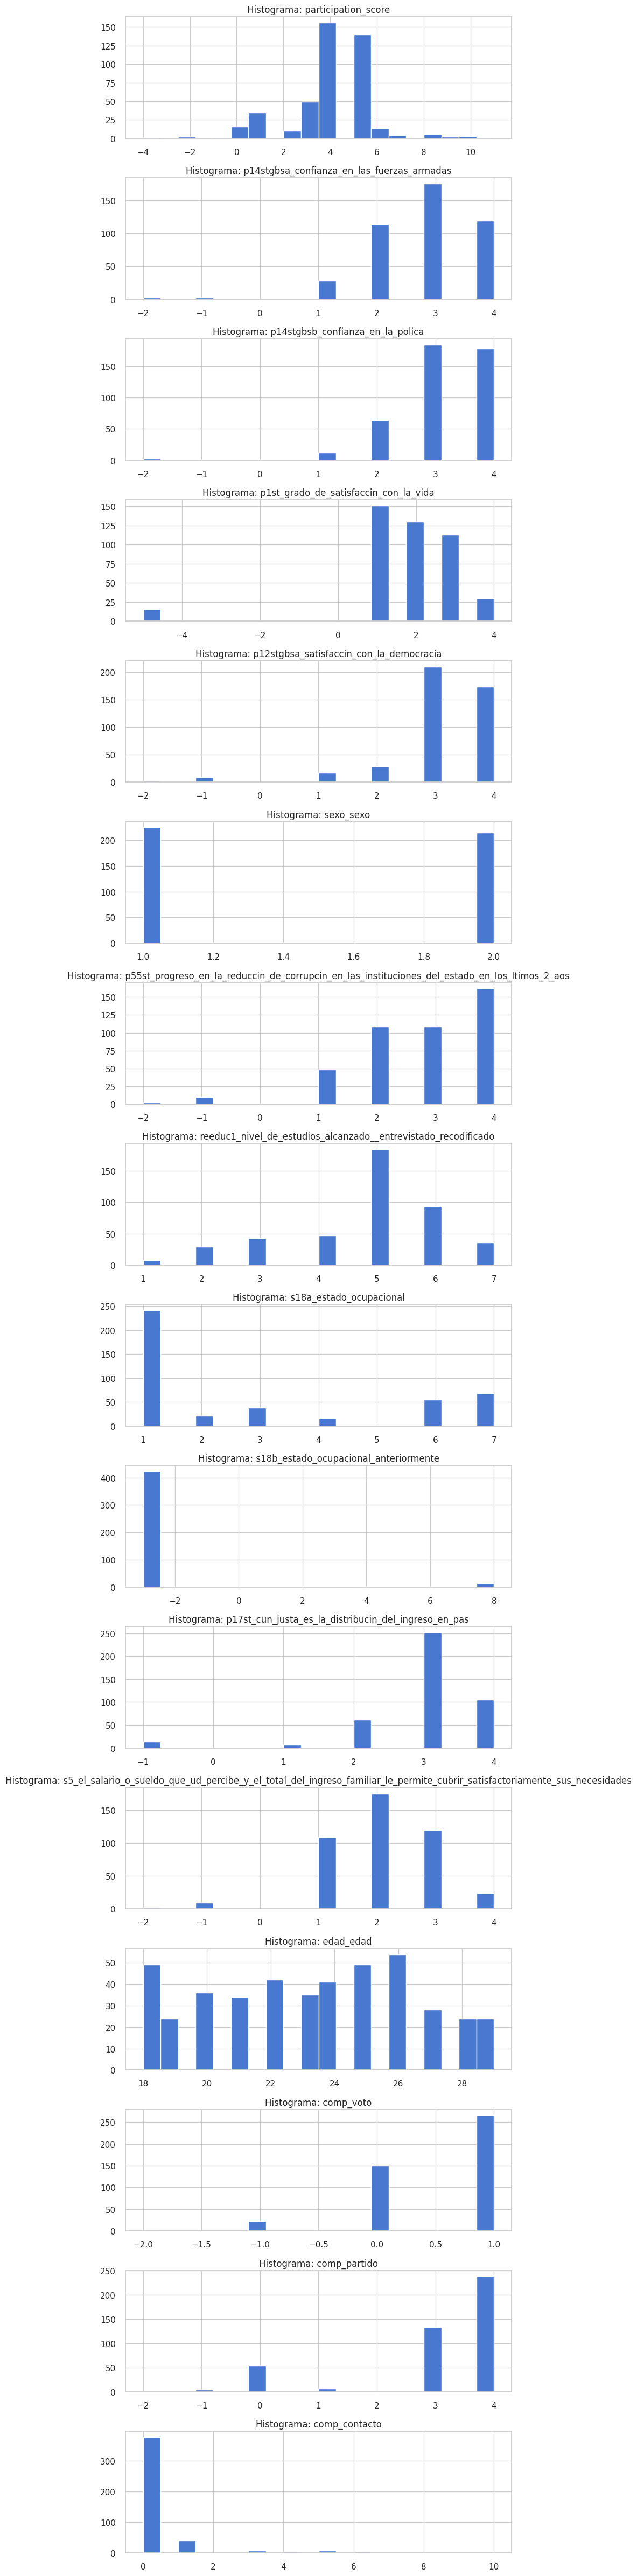

In [ ]:
# Histogramas de variables numéricas candidatas
num_cols = df_modelo.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in ['participacion_politica']]
if num_cols:
    n = len(num_cols)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))
    if n == 1:
        axes = [axes]
    for ax, col in zip(axes, num_cols):
        ax.hist(df_modelo[col].dropna(), bins=20)
        ax.set_title(f"Histograma: {col}")
    plt.tight_layout()
    plt.show()

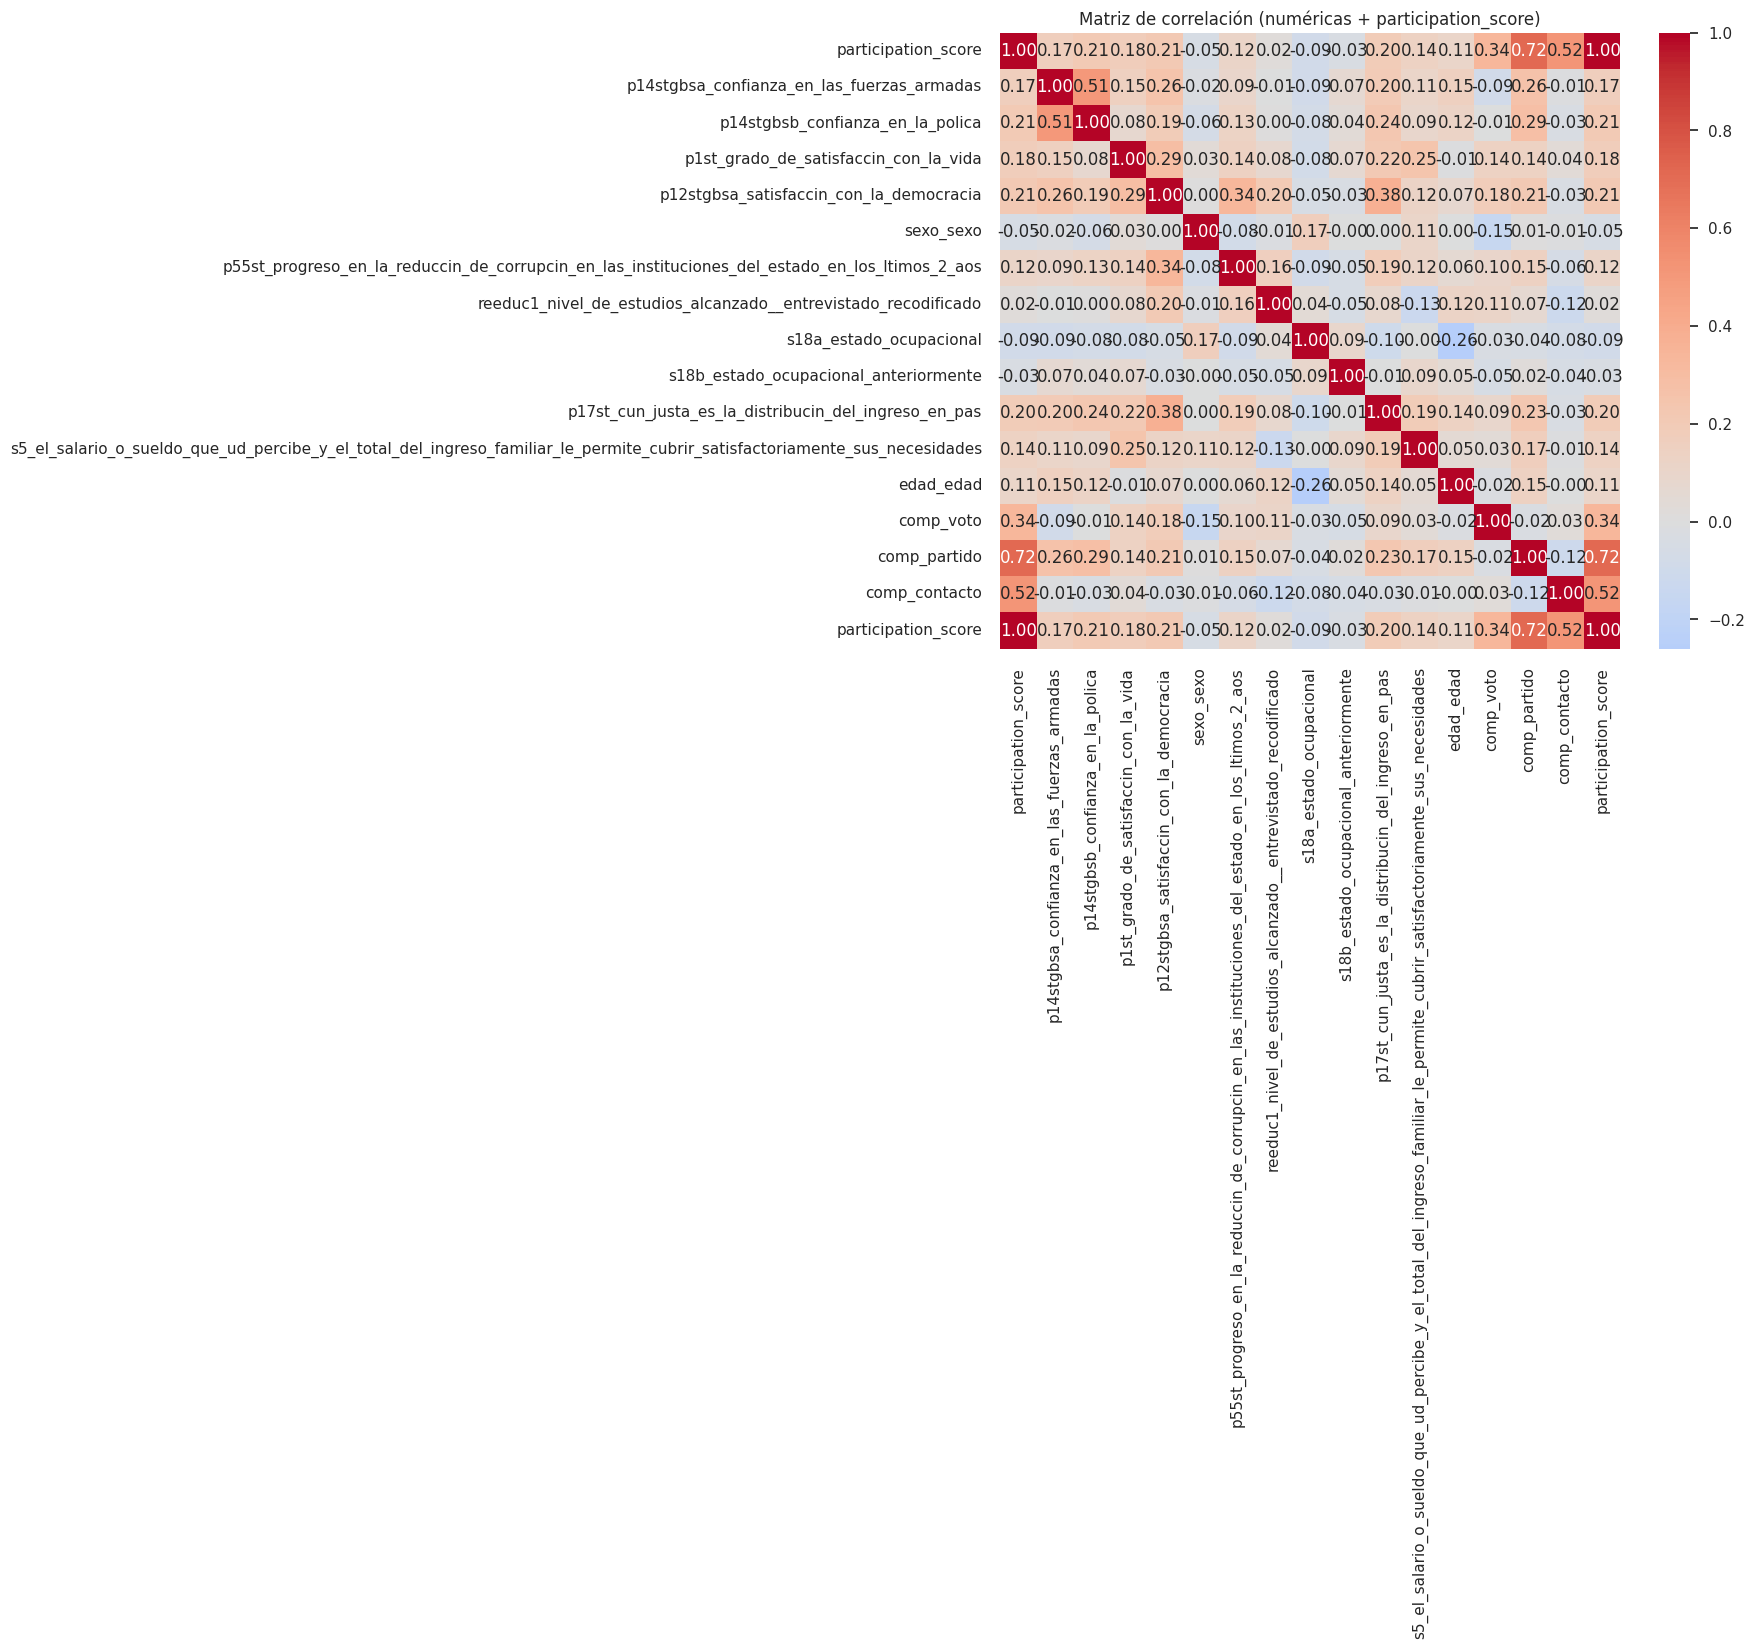

In [ ]:
# Correlación (numéricas)
num_for_corr = [c for c in num_cols if df_modelo[c].nunique() > 1]
if len(num_for_corr) >= 2:
    corr = df_modelo[num_for_corr + ['participation_score']].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Matriz de correlación (numéricas + participation_score)")
    plt.show()

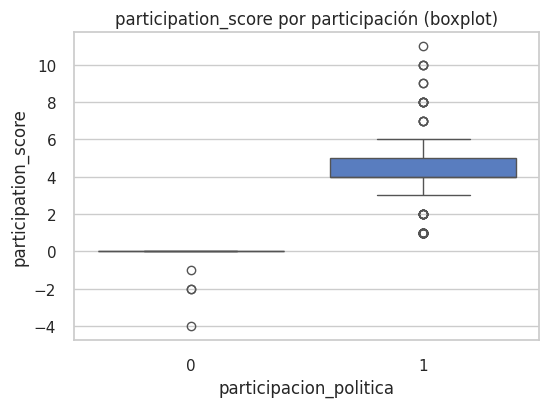

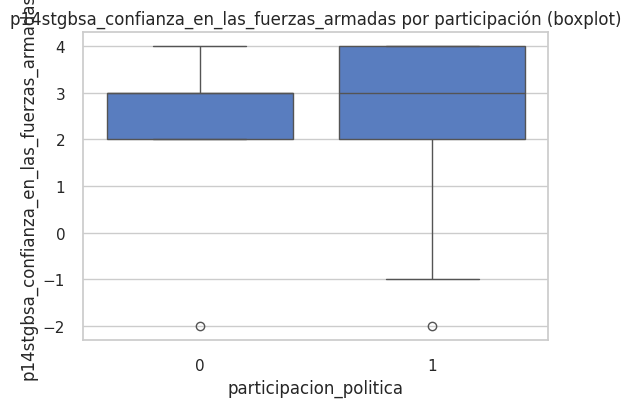

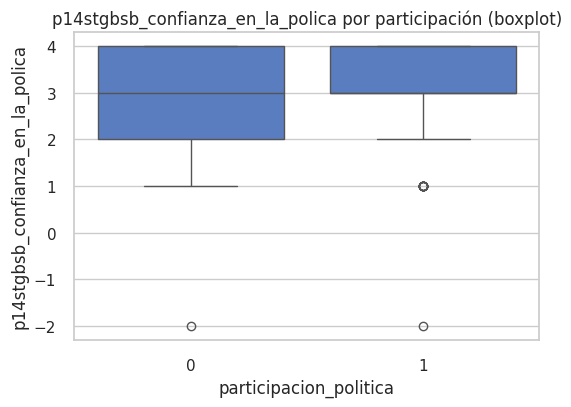

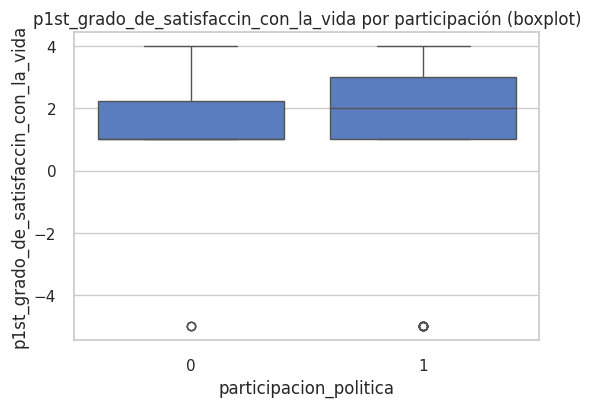

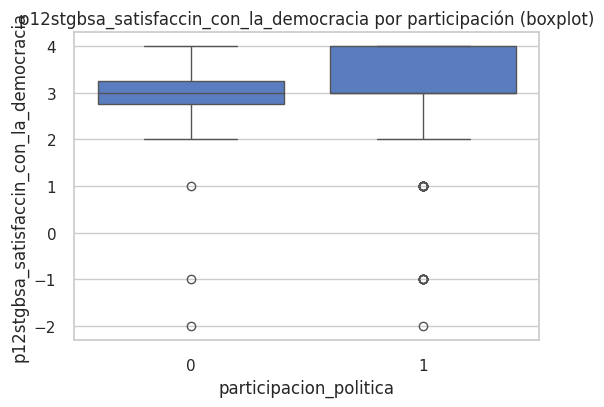

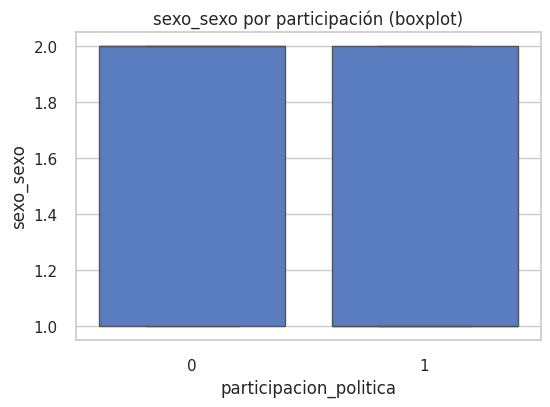

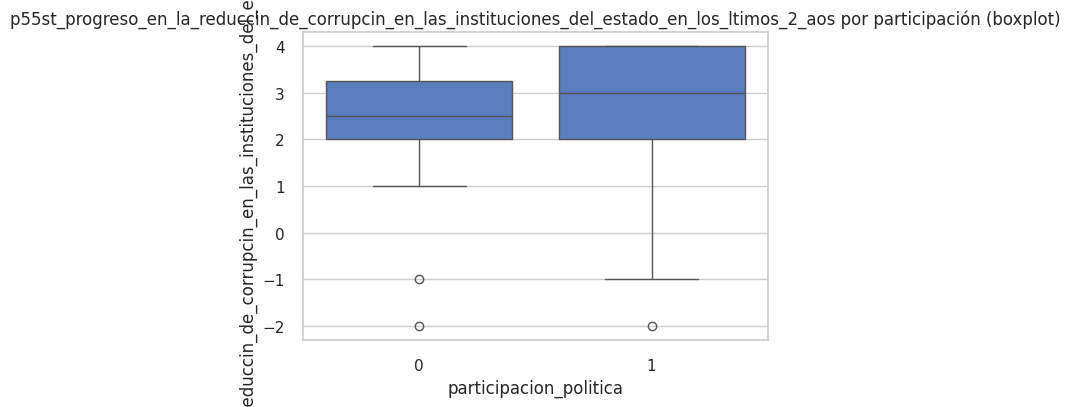

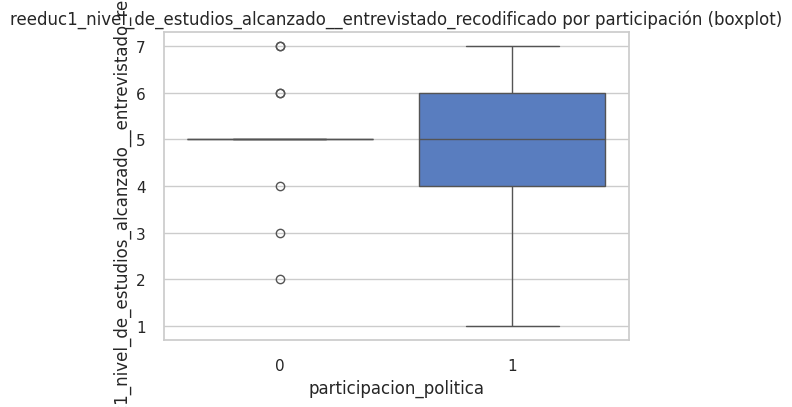

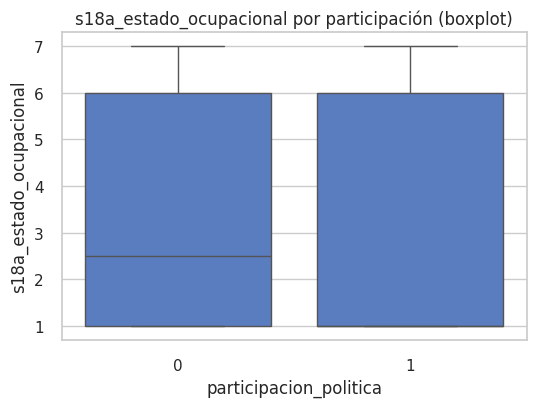

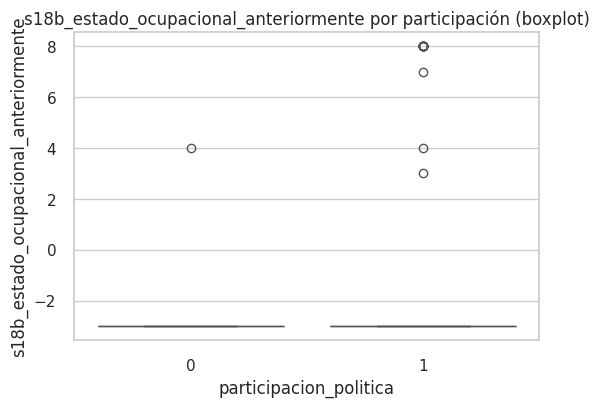

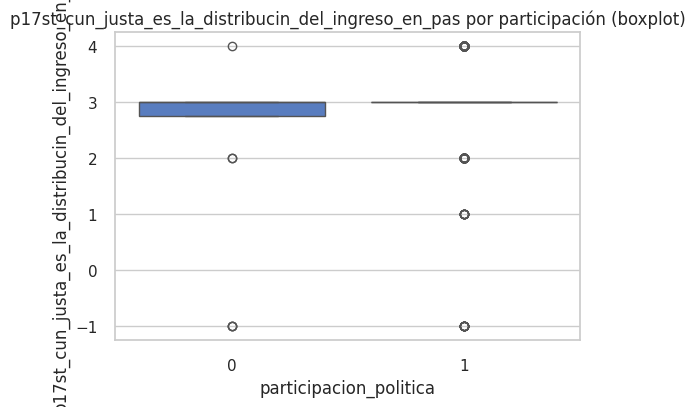

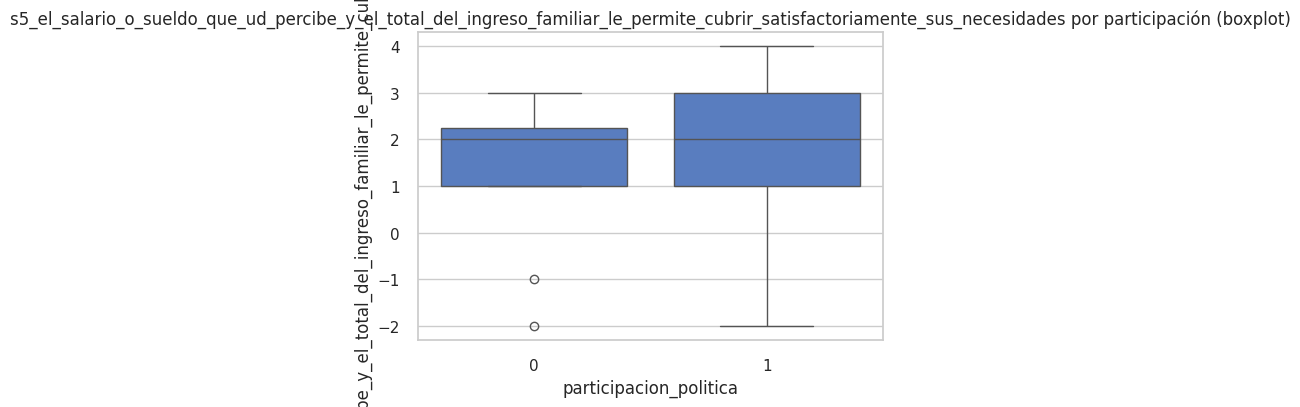

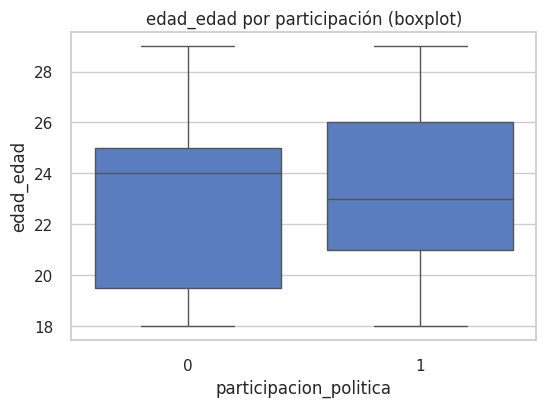

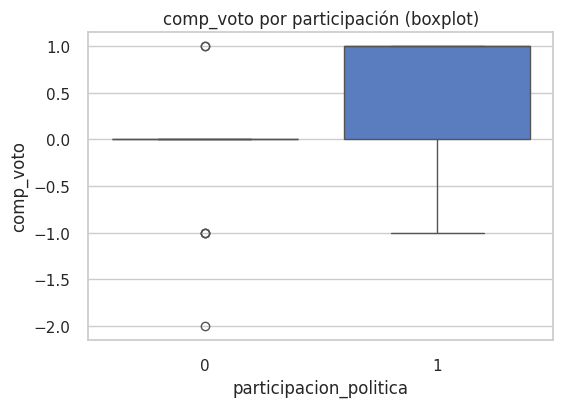

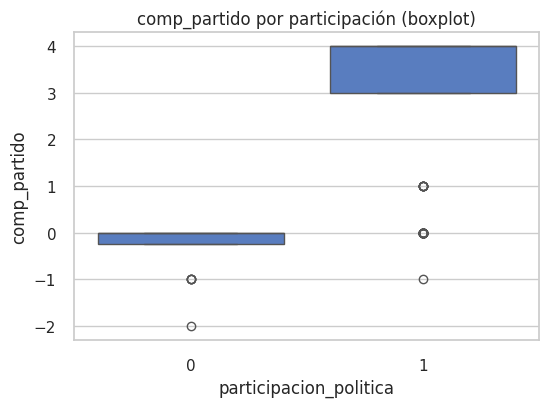

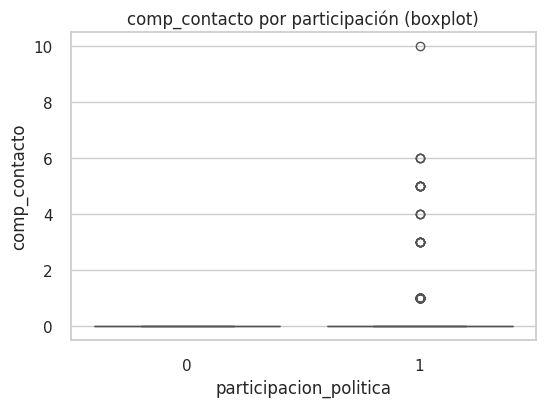

In [ ]:
# Comparaciones por grupo: valores medios de variables numéricas según participacion_politica
for col in num_for_corr:
    try:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='participacion_politica', y=col, data=df_modelo)
        plt.title(f"{col} por participación (boxplot)")
        plt.show()
    except Exception as e:
        print("No se pudo graficar boxplot para", col, e)

In [ ]:
# Para variables categóricas (si existen en independents), mostrar tablas de contingencia
cat_candidates = [c for c in indep_candidates if not pd.api.types.is_numeric_dtype(df_modelo[c])]
for c in cat_candidates:
    if c in df_modelo.columns:
        ct = pd.crosstab(df_modelo[c].fillna("NA"), df_modelo['participacion_politica'], normalize='index')*100
        print(f"\nPorcentajes por categoría de {c} vs participación (primeras 10 filas):")
        display(ct.head(10))
        ct.plot(kind='bar', stacked=False, figsize=(8,4))
        plt.ylabel("Porcentaje")
        plt.title(f"{c} vs Participación (porcentaje por categoría)")
        plt.show()

In [ ]:
# PREPARACIÓN FINAL DE FEATURES PARA MODELADO
# Imputación: numéricos -> mediana ; categóricos -> moda
df_prep = df_modelo.copy()

# separar num y cat (excluyendo target & score)
num_features = [c for c in df_prep.select_dtypes(include=[np.number]).columns if c not in ['participacion_politica','participation_score']]
cat_features = [c for c in indep_candidates if c in df_prep.columns and not pd.api.types.is_numeric_dtype(df_prep[c])]

print("\nNum features:", num_features)
print("Cat features:", cat_features)


Num features: ['p14stgbsa_confianza_en_las_fuerzas_armadas', 'p14stgbsb_confianza_en_la_polica', 'p1st_grado_de_satisfaccin_con_la_vida', 'p12stgbsa_satisfaccin_con_la_democracia', 'sexo_sexo', 'p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos', 'reeduc1_nivel_de_estudios_alcanzado__entrevistado_recodificado', 's18a_estado_ocupacional', 's18b_estado_ocupacional_anteriormente', 'p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas', 's5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades', 'edad_edad', 'comp_voto', 'comp_partido', 'comp_contacto']
Cat features: []


In [ ]:
# Imputar numéricos
if num_features:
    imp_num = SimpleImputer(strategy='median')
    df_prep[num_features] = imp_num.fit_transform(df_prep[num_features])

In [ ]:
# Imputar categóricos
for c in cat_features:
    mode_val = df_prep[c].mode(dropna=True)
    if not mode_val.empty:
        df_prep[c] = df_prep[c].fillna(mode_val[0])
    else:
        df_prep[c] = df_prep[c].fillna("missing")

In [ ]:
# Codificación: label encoding para inspección y one-hot para modelado
label_encoders = {}
for c in cat_features:
    le = LabelEncoder()
    try:
        df_prep[f'{c}_le'] = le.fit_transform(df_prep[c].astype(str))
        label_encoders[c] = le
    except Exception as e:
        print("LabelEncoder falló para", c, e)

In [ ]:
# One-hot (drop_first=True)
if cat_features:
    df_ohe = pd.get_dummies(df_prep[cat_features].astype(str), prefix=cat_features, drop_first=True)
else:
    df_ohe = pd.DataFrame(index=df_prep.index)

In [ ]:
# Escalado de numéricos
scaler = StandardScaler()
if num_features:
    df_scaled_num = pd.DataFrame(scaler.fit_transform(df_prep[num_features]), columns=[f"{c}_sc" for c in num_features], index=df_prep.index)
else:
    df_scaled_num = pd.DataFrame(index=df_prep.index)


In [ ]:
# Concatenar features finales
X = pd.concat([df_scaled_num, df_ohe], axis=1)
y = df_prep['participacion_politica']

print("\nDimensiones features X:", X.shape, "Dimensiones y:", y.shape)
print("Primeras columnas de X:", X.columns[:40].tolist())


Dimensiones features X: (440, 15) Dimensiones y: (440,)
Primeras columnas de X: ['p14stgbsa_confianza_en_las_fuerzas_armadas_sc', 'p14stgbsb_confianza_en_la_polica_sc', 'p1st_grado_de_satisfaccin_con_la_vida_sc', 'p12stgbsa_satisfaccin_con_la_democracia_sc', 'sexo_sexo_sc', 'p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos_sc', 'reeduc1_nivel_de_estudios_alcanzado__entrevistado_recodificado_sc', 's18a_estado_ocupacional_sc', 's18b_estado_ocupacional_anteriormente_sc', 'p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas_sc', 's5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades_sc', 'edad_edad_sc', 'comp_voto_sc', 'comp_partido_sc', 'comp_contacto_sc']


In [ ]:
# Guardar dataset preprocesado listo para modelado
output_path = "processed_participacion_jovenes.csv"
df_final = pd.concat([y.reset_index(drop=True), X.reset_index(drop=True)], axis=1)
df_final.to_csv(output_path, index=False)
print("\nDataset preprocesado guardado en:", output_path)
display(df_final.head(8))



Dataset preprocesado guardado en: processed_participacion_jovenes.csv


,participacion_politica,p14stgbsa_confianza_en_las_fuerzas_armadas_sc,p14stgbsb_confianza_en_la_polica_sc,p1st_grado_de_satisfaccin_con_la_vida_sc,p12stgbsa_satisfaccin_con_la_democracia_sc,sexo_sexo_sc,p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos_sc,reeduc1_nivel_de_estudios_alcanzado__entrevistado_recodificado_sc,s18a_estado_ocupacional_sc,s18b_estado_ocupacional_anteriormente_sc,p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas_sc,s5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades_sc,edad_edad_sc,comp_voto_sc,comp_partido_sc,comp_contacto_sc
0,1,-0.866976,-0.211407,-0.492119,-0.143085,-0.977525,-0.647191,0.144155,0.458998,5.335366,-0.982390,0.949030,-0.081930,0.747682,-0.061965,-0.294347
1,1,-0.866976,-1.374143,0.745209,-0.143085,-0.977525,0.173455,1.602279,0.458998,2.820302,1.100750,-0.054752,1.445584,0.747682,0.655523,-0.294347
2,1,0.161244,0.951330,-0.492119,0.840627,-0.977525,0.994100,0.144155,-0.780016,-0.197776,0.059180,-1.058533,-0.692936,0.747682,0.655523,-0.294347
3,1,-1.895196,-1.374143,-0.492119,-2.110511,-0.977525,-1.467837,-1.313968,1.285008,-0.197776,0.059180,1.952812,-1.609444,-0.905484,0.655523,-0.294347
4,1,0.161244,0.951330,-0.492119,-0.143085,-0.977525,0.994100,0.144155,-0.780016,-0.197776,-4.107099,-1.058533,0.223573,0.747682,0.655523,-0.294347
5,1,0.161244,-0.211407,0.126545,0.840627,-0.977525,0.994100,0.873217,-0.780016,-0.197776,0.059180,-1.058533,0.834578,0.747682,0.655523,-0.294347
6,1,-1.895196,-1.374143,0.126545,0.840627,-0.977525,-0.647191,0.873217,1.285008,-0.197776,-0.982390,-0.054752,0.529075,0.747682,-0.061965,-0.294347
7,1,-0.866976,-0.211407,0.745209,-0.143085,1.022992,-1.467837,0.144155,1.285008,-0.197776,0.059180,-0.054752,-1.303942,0.747682,-0.061965,-0.294347


In [ ]:
# Resumen final
summary = {
    "n_registros_total": int(df.shape[0]),
    "n_registros_jovenes": int(df_jovenes.shape[0]),
    "n_componentes_participacion": len(comp_cols),
    "n_indep_candidatas": len(indep_candidates),
    "n_features_finales": X.shape[1],
    "ruta_guardado": os.path.abspath(output_path)
}
print("\n--- Resumen ---")
print(summary)


--- Resumen ---
{'n_registros_total': 1200, 'n_registros_jovenes': 440, 'n_componentes_participacion': 3, 'n_indep_candidatas': 12, 'n_features_finales': 15, 'ruta_guardado': '/content/processed_participacion_jovenes.csv'}


In [ ]:
# Variables independientes teóricas (ahora usamos las que se encontraron en el EDA)
variables_indep_actual = indep_candidates

# Variable dependiente
target = 'participacion_politica'

# Subconjunto para el análisis
# Usamos df_modelo que ya está filtrado y contiene las columnas relevantes
data_model = df_modelo[variables_indep_actual + [target]].dropna()

print("Dimensiones de data_model:", data_model.shape)
print("Columnas de data_model:", data_model.columns.tolist())

Dimensiones de data_model: (440, 13)
Columnas de data_model: ['p14stgbsa_confianza_en_las_fuerzas_armadas', 'p14stgbsb_confianza_en_la_polica', 'p1st_grado_de_satisfaccin_con_la_vida', 'p12stgbsa_satisfaccin_con_la_democracia', 'sexo_sexo', 'p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos', 'reeduc1_nivel_de_estudios_alcanzado__entrevistado_recodificado', 's18a_estado_ocupacional', 's18b_estado_ocupacional_anteriormente', 'p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas', 's5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades', 'edad_edad', 'participacion_politica']


In [ ]:
# Configuración de entorno en PyCaret
clf = setup(
    data=data_model,
    target=target,
    session_id=123,
    normalize=True,
    feature_selection=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.8,
    fix_imbalance=True,
    use_gpu=False
)

[LightGBM] [Info] Number of positive: 294, number of negative: 294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 588, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

,Description,Value
0,Session id,123
1,Target,participacion_politica
2,Target type,Binary
3,Original data shape,"(440, 13)"
4,Transformed data shape,"(720, 3)"
5,Transformed train set shape,"(588, 3)"
6,Transformed test set shape,"(132, 3)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Entrenar y comparar modelos automáticamente
best_model = compare_models(sort='AUC')  # o 'Accuracy' según preferencia

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.5286,0.5613,0.5268,0.9700,0.6519,0.0082,0.0367,0.0780
qda,Quadratic Discriminant Analysis,0.5583,0.5168,0.5644,0.9565,0.7068,-0.0091,-0.0009,0.0790
dt,Decision Tree Classifier,0.9288,0.5080,0.9731,0.9535,0.9628,-0.0219,-0.0237,0.0790
nb,Naive Bayes,0.5259,0.5020,0.5269,0.9602,0.6774,-0.0039,0.0092,0.0780
dummy,Dummy Classifier,0.0454,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0750
et,Extra Trees Classifier,0.9095,0.4868,0.9529,0.9525,0.9518,-0.0283,-0.0322,0.2130
xgboost,Extreme Gradient Boosting,0.9224,0.4620,0.9662,0.9530,0.9591,-0.0258,-0.0275,0.1980
ada,Ada Boost Classifier,0.8770,0.4590,0.9191,0.9510,0.9328,-0.0443,-0.0531,0.1620
rf,Random Forest Classifier,0.9159,0.4536,0.9595,0.9528,0.9556,-0.0275,-0.0301,0.4810
lr,Logistic Regression,0.5062,0.4140,0.5061,0.9581,0.6581,-0.0080,-0.0205,1.0930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

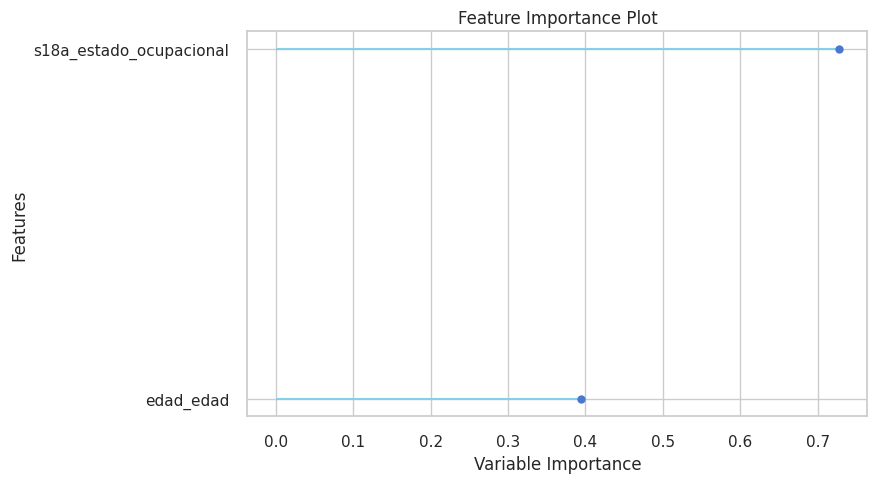

In [ ]:
# Ver importancia de variables
plot_model(best_model, plot='feature')

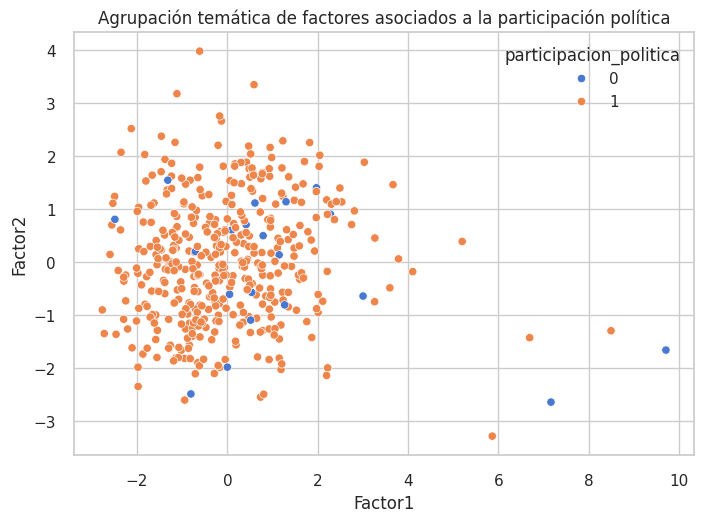

Varianza explicada por cada componente: [0.19730271 0.11186595 0.10930572]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalamos las variables independientes
X = data_model[variables_indep_actual]
X_scaled = StandardScaler().fit_transform(X)

# Aplicamos PCA
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)

# Convertimos a DataFrame
pca_df = pd.DataFrame(data=components, columns=['Factor1', 'Factor2', 'Factor3'])
pca_df['participacion_politica'] = data_model[target].values

# Visualizamos los factores
sns.scatterplot(x='Factor1', y='Factor2', hue='participacion_politica', data=pca_df)
plt.title('Agrupación temática de factores asociados a la participación política')
plt.show()
# Mostrar la varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

In [ ]:
from pycaret.clustering import *

# --- 1.1. Subconjunto solo con variables independientes ---
X_cluster = df_modelo[variables_indep_actual].copy()

# Opcional: si tienes IDs o variables que NO deben entrar al clustering,
# las puedes excluir aquí manualmente.

print("Dimensión de X_cluster:", X_cluster.shape)

# --- 1.2. Setup de PyCaret para clustering ---
clu_setup = setup(
    data=X_cluster,
    session_id=123,
    normalize=True,          # escalado básico
    ignore_features=None,    # puedes pasar una lista si quieres excluir algo
    verbose=False
)

# --- 1.3. Probar distintos K usando K-Means y ver silhouette ---
from sklearn.metrics import silhouette_score

sil_results = {}

for k in range(2, 8):  # por ejemplo de 2 a 7 clusters
    kmeans_k = create_model('kmeans', num_clusters=k)
    assigned_k = assign_model(kmeans_k)
    score_k = silhouette_score(
        assigned_k.drop(columns=['Cluster']),  # solo features
        assigned_k['Cluster']
    )
    sil_results[k] = score_k
    print(f"K = {k} | Silhouette = {score_k:.4f}")

# Elegir el K con mejor silhouette
best_k = max(sil_results, key=sil_results.get)
print(f"\nMejor número de clusters según silhouette: K = {best_k}")

# --- 1.4. Entrenar modelo definitivo de clustering con ese K ---
best_kmeans = create_model('kmeans', num_clusters=best_k)

# Asignar el cluster a cada observación
clustered = assign_model(best_kmeans)
clustered.head()

Dimensión de X_cluster: (440, 12)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1269,57.4558,2.5770,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

K = 2 | Silhouette = 0.1183


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0924,43.3139,2.6199,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

K = 3 | Silhouette = 0.0428


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1077,47.2499,2.1333,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

K = 4 | Silhouette = 0.0686


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1310,50.1892,1.8656,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

K = 5 | Silhouette = 0.1524


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1226,45.4216,1.8905,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

K = 6 | Silhouette = 0.1176


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1179,40.9124,1.9070,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

K = 7 | Silhouette = 0.0940

Mejor número de clusters según silhouette: K = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1310,50.1892,1.8656,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,p14stgbsa_confianza_en_las_fuerzas_armadas,p14stgbsb_confianza_en_la_polica,p1st_grado_de_satisfaccin_con_la_vida,p12stgbsa_satisfaccin_con_la_democracia,sexo_sexo,p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos,reeduc1_nivel_de_estudios_alcanzado__entrevistado_recodificado,s18a_estado_ocupacional,s18b_estado_ocupacional_anteriormente,p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas,s5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades,edad_edad,Cluster
0,2,3,1,3,1,2,5,4,8,2,3,23,Cluster 3
1,2,2,3,3,1,3,7,4,3,4,2,28,Cluster 3
2,3,4,1,4,1,4,5,1,-3,3,1,21,Cluster 0
3,1,2,1,1,1,1,3,6,-3,3,4,18,Cluster 4
4,3,4,1,3,1,4,5,1,-3,-1,1,24,Cluster 4


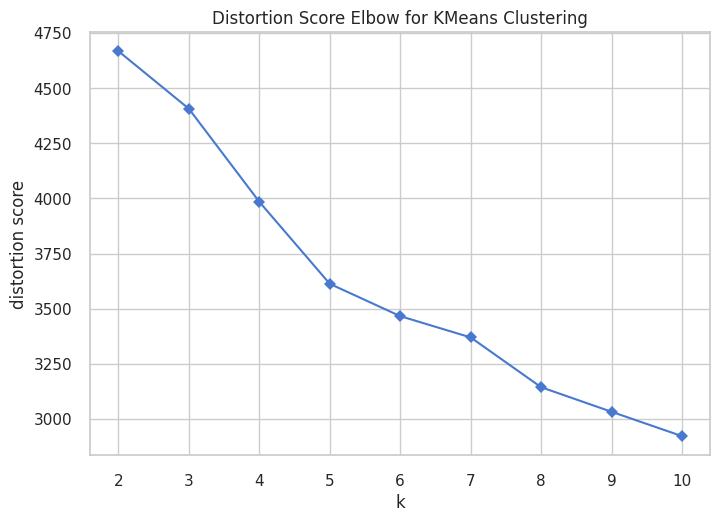

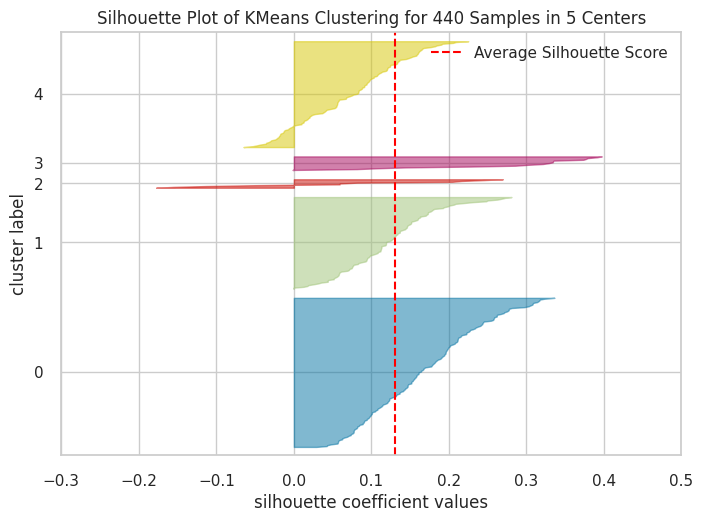

In [ ]:
 # Evaluación visual de clustering
plot_model(best_kmeans, plot='elbow')          # curva del codo
plot_model(best_kmeans, plot='silhouette')     # silhouette por cluster
plot_model(best_kmeans, plot='cluster')        # proyección 2D con PCA


In [ ]:
# Unir de nuevo la etiqueta de participación
clustered_full = clustered.copy()
clustered_full[target] = df_modelo[target].values

# Distribución de participación por cluster
print(clustered_full.groupby('Cluster')[target].value_counts(normalize=True).mul(100).round(1))


Cluster    participacion_politica
Cluster 0  1                         97.2
           0                          2.8
Cluster 1  1                         96.3
           0                          3.7
Cluster 2  1                         72.7
           0                         27.3
Cluster 3  1                         94.1
           0                          5.9
Cluster 4  1                         94.4
           0                          5.6
Name: proportion, dtype: float64


In [ ]:

# MODEL TRAINING AND EVALUATION (CLASIFICACIÓN

from pycaret.classification import *

# --- 2.1. Data para clasificación ---
# Incluimos solo las variables independientes + target
cols_model = variables_indep_actual + [target]
data_model = df_modelo[cols_model].dropna()  # quitamos filas con NA en estas columnas

print("Dimensión de data_model:", data_model.shape)
data_model[target].value_counts(normalize=True)


Dimensión de data_model: (440, 13)


,proportion
participacion_politica,
1,0.954545
0,0.045455


In [ ]:
# Setup de PyCaret para clasificación
clf_setup = setup(
    data=data_model,
    target=target,
    session_id=123,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.8,
    fix_imbalance=True,        # maneja desbalance en la clase
    verbose=False
)

In [ ]:
# Comparar modelos y elegir el mejor
best_clf = compare_models(sort='AUC')
print(best_clf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.5351,0.5105,0.5464,0.9415,0.6866,-0.0357,-0.0687,0.0750
dummy,Dummy Classifier,0.0454,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0430
qda,Quadratic Discriminant Analysis,0.9353,0.4791,0.9794,0.9533,0.9656,-0.0135,-0.0148,0.0430
dt,Decision Tree Classifier,0.8639,0.4527,0.9054,0.9505,0.9264,-0.0556,-0.0640,0.1090
ada,Ada Boost Classifier,0.9287,0.4492,0.9694,0.9569,0.9627,0.0248,0.0326,0.1330
ridge,Ridge Classifier,0.6038,0.4393,0.6225,0.9451,0.7476,-0.0417,-0.0634,0.0730
lda,Linear Discriminant Analysis,0.6038,0.4393,0.6225,0.9451,0.7476,-0.0417,-0.0634,0.0660
lr,Logistic Regression,0.6232,0.4223,0.6429,0.9468,0.7619,-0.0407,-0.0569,1.4240
et,Extra Trees Classifier,0.9417,0.4101,0.9866,0.9541,0.9697,-0.0096,-0.0108,0.2730
knn,K Neighbors Classifier,0.7042,0.3884,0.7284,0.9516,0.8199,-0.0162,-0.0399,0.1050


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

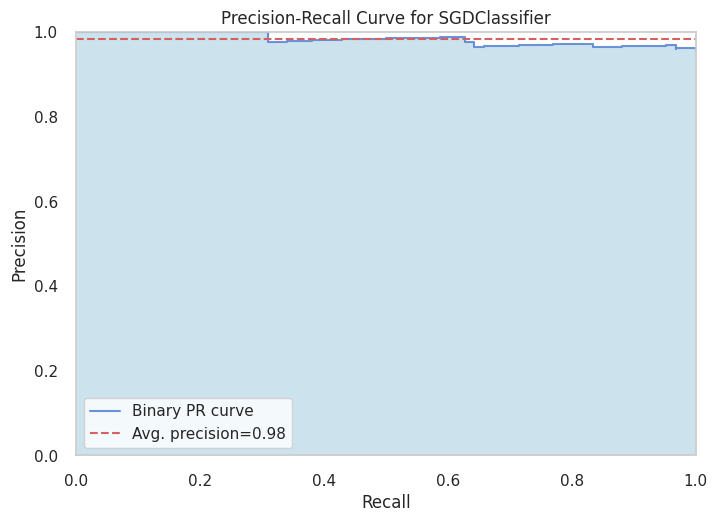

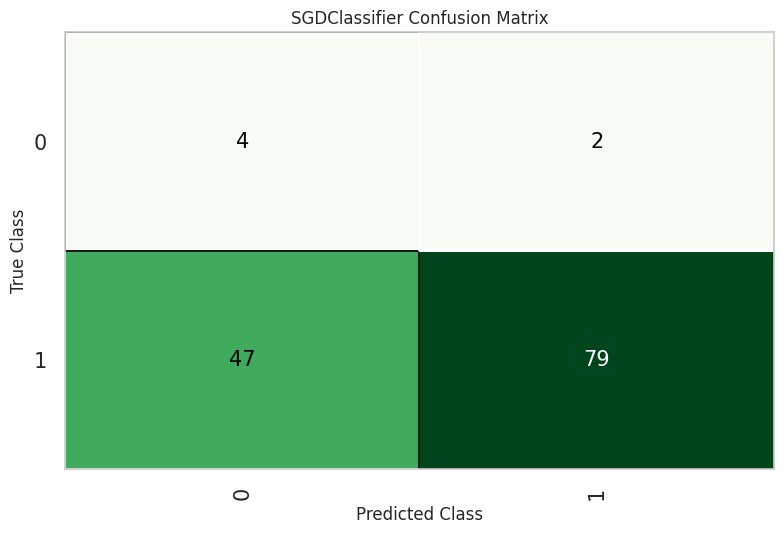

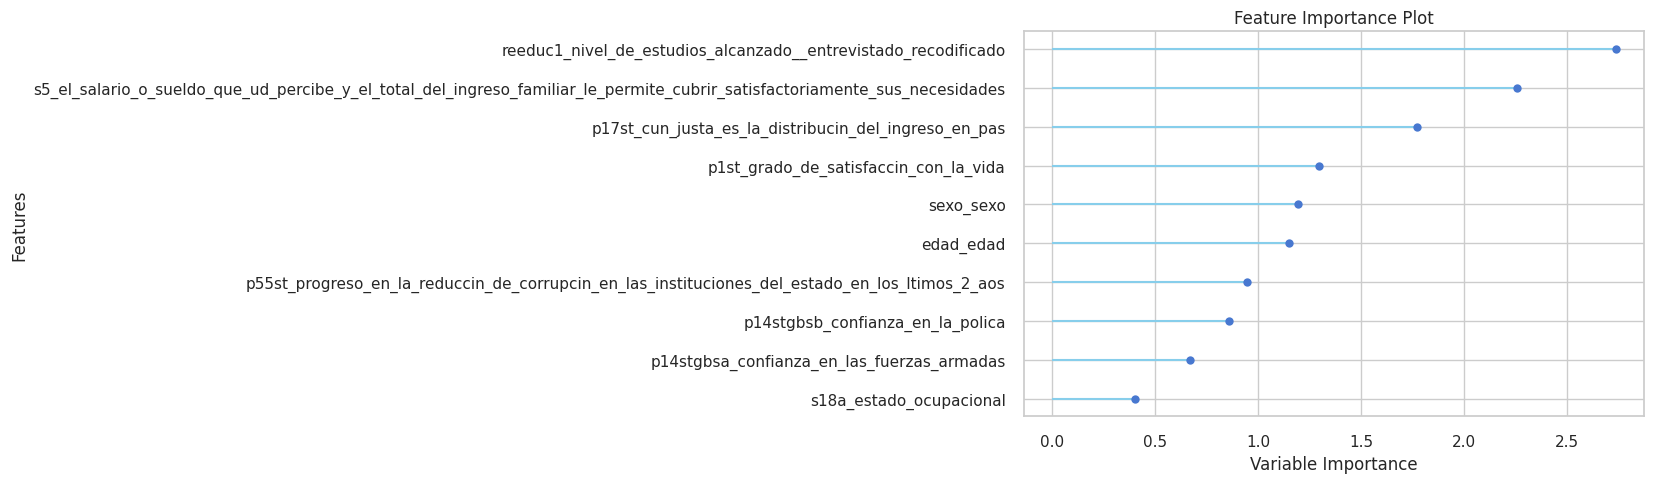

In [ ]:
# Evaluación detallada del mejor modelo ---
evaluate_model(best_clf)              # abre interfaz con varios gráficos

# Gráficos clave:
# plot_model(best_clf, plot='auc')      # curva ROC (Comentado porque SGDClassifier con loss='hinge' no tiene predict_proba)
plot_model(best_clf, plot='pr')       # Precision-Recall
plot_model(best_clf, plot='confusion_matrix')
plot_model(best_clf, plot='feature')  # importancia de variables

In [ ]:
# INFERENCIA – CLASIFICACIÓN
save_model(best_clf, 'modelo_participacion_politica')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['p14stgbsa_confianza_en_las_fuerzas_armadas',
                                              'p14stgbsb_confianza_en_la_polica',
                                              'p1st_grado_de_satisfaccin_con_la_vida',
                                              'p12stgbsa_satisfaccin_con_la_democracia',
                                              'sexo_sexo',
                                              'p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_...
                 ('trained_model',
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.001,
                                fit_intercept=True, l1_ratio=0.15,
                                learning_rate='optimal', loss='hinge',
          

In [ ]:
# --- 3.1.2. Simular nuevos datos (ejemplo) ---
# En práctica, aquí vendría un nuevo dataset con las MISMAS columnas que variables_indep_actual.

new_data = df_modelo[variables_indep_actual].sample(10, random_state=123)  # solo como ejemplo
new_data.head()


,p14stgbsa_confianza_en_las_fuerzas_armadas,p14stgbsb_confianza_en_la_polica,p1st_grado_de_satisfaccin_con_la_vida,p12stgbsa_satisfaccin_con_la_democracia,sexo_sexo,p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos,reeduc1_nivel_de_estudios_alcanzado__entrevistado_recodificado,s18a_estado_ocupacional,s18b_estado_ocupacional_anteriormente,p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas,s5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades,edad_edad
13,2,3,3,1,2,3,5,1,-3,3,3,29
299,2,2,3,3,2,3,2,4,8,3,3,24
142,3,3,3,3,1,3,5,7,-3,3,2,22
202,4,4,4,4,1,4,6,1,-3,4,2,25
170,3,3,3,4,1,4,6,1,-3,3,1,19


In [ ]:
# --- 3.1.3. Cargar modelo y hacer predicciones ---
loaded_clf = load_model('modelo_participacion_politica')

predicciones = predict_model(loaded_clf, data=new_data)
predicciones.head()


Transformation Pipeline and Model Successfully Loaded


,p14stgbsa_confianza_en_las_fuerzas_armadas,p14stgbsb_confianza_en_la_polica,p1st_grado_de_satisfaccin_con_la_vida,p12stgbsa_satisfaccin_con_la_democracia,sexo_sexo,p55st_progreso_en_la_reduccin_de_corrupcin_en_las_instituciones_del_estado_en_los_ltimos_2_aos,reeduc1_nivel_de_estudios_alcanzado__entrevistado_recodificado,s18a_estado_ocupacional,s18b_estado_ocupacional_anteriormente,p17st_cun_justa_es_la_distribucin_del_ingreso_en_pas,s5_el_salario_o_sueldo_que_ud_percibe_y_el_total_del_ingreso_familiar_le_permite_cubrir_satisfactoriamente_sus_necesidades,edad_edad,prediction_label
13,2,3,3,1,2,3,5,1,-3,3,3,29,1
299,2,2,3,3,2,3,2,4,8,3,3,24,1
142,3,3,3,3,1,3,5,7,-3,3,2,22,1
202,4,4,4,4,1,4,6,1,-3,4,2,25,1
170,3,3,3,4,1,4,6,1,-3,3,1,19,0
